In [145]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os
import math

#from mpltools import special ##leon

class RawData(object):
    def __init__(self,timestamp,keytime,ttime,keypress,targetid,target_lon,target_lat,target_x,target_y,target_z,hmd_rx,hmd_ry,hmd_rz):
        self.timestamp=timestamp # 1
        self.keytime=keytime # 2
        self.ttime=ttime # 3
        self.keypress=keypress # 4
        self.targetid=targetid # 5
        self.target_lon=target_lon
        self.target_lat=target_lat
        self.target_x=target_x
        self.target_y=target_y
        self.target_z=target_z
        self.hmd_rx=hmd_rx
        self.hmd_ry=hmd_ry
        self.hmd_rz=hmd_rz

def read_data(file,rawdata):
    print("Reading %s"%file)
    seperator="\t"
    with open(file,"r") as fp:
        for line in fp:
            if line.startswith("Time"):
                continue
            l=line[:-1]
            f=l.split(seperator) 
            if(int(f[3])==1):
                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),float(f[4]),float(f[5]),float(f[6]),float(f[7]),float(f[8]),float(f[9]),float(f[10]),float(f[11]),float(f[12])))
            else: 
                rawdata.append(RawData(f[0],float(f[1]),float(f[2]),float(f[3]),float(f[4]),0,0,0,0,0,float(f[10]),float(f[11]),float(f[12])))
                
    return rawdata

class TimeData(object):
    def __init__(self,targetid,target_lon,target_lat,deltatime):
        self.targetid=targetid
        self.target_lon=target_lon
        self.target_lat=target_lat
        self.deltatime=deltatime
        
class posDataClass(object):
    def __init__(self,targetid,target_lon,target_lat,zeroTime,relativeTime):
        self.targetid=targetid
        self.target_lon=target_lon
        self.target_lat=target_lat
        self.zeroTime=zeroTime
        self.relativeTime = relativeTime

def process_time(raw_data):
    timeData={}
    filteredData=[a for a in raw_data if a.keypress==1]
    for i in range(len(filteredData)-1):
        if(filteredData[i+1].targetid!=filteredData[i].targetid):
            continue # when resuming back
        if((i <= len(filteredData)-3) and (filteredData[i-1].targetid==filteredData[i+2].targetid)):
            continue # when two same targets appear one after one
        deltaTime=filteredData[i+1].ttime-filteredData[i].ttime
        #print(deltaTime, filteredData[i].targetid)

        key1=str(int(filteredData[i].target_lat))
        key2=str(int(filteredData[i].target_lon))
        if(key1 in timeData)==False:
            timeData[key1]={}
        if(key2 in timeData[key1])==False:
            timeData[key1][key2]=[]
        
        timeData[key1][key2].append(TimeData(filteredData[i].targetid,filteredData[i].target_lon,filteredData[i].target_lat,deltaTime))
    timeData[str(0)][str(0)]=[]   
    timeData[str(0)][str(0)].append(TimeData(float(21),float(0),float(0),float(0)))
#    print(timeData['0'][str(180)])
        #print(key1, key2)
    return timeData

def track_head(raw_data):
    posData = {}
    zeroTime = 0
    currentTargetID = 0

    for i in range(len(raw_data)):
        if (raw_data[i].keypress == 1 and raw_data[i].targetid != currentTargetID):
            zeroTime = raw_data[i].ttime
            currentTargetID = raw_data[i].targetid
        continue
        relativeTime = raw_data[i].ttime - zeroTime
        
        key1=str(int(filteredData[i].target_lat))
        key2=str(int(filteredData[i].target_lon))
        key3=str(zeroTime)
        if(key1 in timeData)==False:
            posData[key1]={}
        if(key2 in timeData[key1])==False:
            posData[key1][key2]={}
        if(key3 in timeData[key1][key2])==False:
            posData[key1][key2][key3]=[]
        
        posData[key1][key2].append(posDataClass(raw_data[i].targetid,raw_data[i].target_lon,raw_data[i].target_lat, zeroTime, relativeTime))
        
    return posData

def plotTrial(raw_data,fig,raw,col,idx):
    #fig = plt.figure()
    ax = fig.add_subplot(raw,col,idx)
    for i in range(13):
        tx=[a.tx for a in raw_data if a.keypress==1]
        ty=[a.ty for a in raw_data if a.fittstrial==trial and a.tid==i]
        x=[a.x for a in raw_data if a.fittstrial==trial and a.tid==i]
        y=[a.y for a in raw_data if a.fittstrial==trial and a.tid==i]
        z=[a.z for a in raw_data if a.fittstrial==trial and a.tid==i]


        mpl.rcParams['legend.fontsize'] = 7

        ax.scatter(tx,ty)
        ax.plot(x, y, label='tid:'+str(i))
    #ax.legend()


def read_plot(path,raw,fig): # return
    raw_data=[]
    raw_data=read_data(path,raw_data)
    timeData=process_time(raw_data)
    #key1=['-30','0','30']
    key1=['0','0','0']
    key2=[30,60,90,120,150,180]
    #return timeData


    means=[]
    stddev=[]
    for k1 in range(len(key1)):
        m1=[]
        s1=[]
        for k2 in range(len(key2)):
            #if(k1==1 and k2==0):
            #if(k2==0):
            #    m1.append(0)
            #    s1.append(0)
            #    continue
            data=[a.deltatime for a in timeData[key1[k1]][str(key2[k2])]]
            mean=np.mean(data)
            std=np.std(data)
            
            m1.append(mean)
            s1.append(std)
        means.append(m1)
        stddev.append(s1)        
    return means

def read_plot2(path,raw,fig): # return
    raw_data=[]
    raw_data=read_data(path,raw_data)
    timeData=process_time(raw_data)
    

    key1=['-30','0','30']
    if (len(timeData) == 1):
        key1=['0']
    #key1=['0']
    key2=[0,30,60,90,120,150,180]
    #return timeData

    
    means=[]
    stddev=[]
    for k1 in range(len(key1)):
        m1=[]
        s1=[]
        for k2 in range(len(key2)):
            if(k1==1 and k2==0):
            #if(k2==0):
                m1.append(0)
                s1.append(0)
                continue
            data=[a.deltatime for a in timeData[key1[k1]][str(key2[k2])]]
            mean=np.mean(data)
            std=np.std(data)
            
            m1.append(mean)
            s1.append(std)
            
        means.append(m1)
        stddev.append(s1)
    
    
    if (len(timeData) == 3):
        m1=[]
        s1=[]
        data=[]

        for k2 in range(len(key2)):

            data.extend([a.deltatime for a in timeData[key1[0]][str(key2[k2])]])
            data.extend([a.deltatime for a in timeData[key1[1]][str(key2[k2])]])
            data.extend([a.deltatime for a in timeData[key1[2]][str(key2[k2])]])

            mean=np.mean(data)
            std=np.std(data)
            
            m1.append(mean)
            s1.append(std)
        
    #print (means) 
    means.append(m1)
    stddev.append(s1)
    #print (means) 

    return means


def read_plot3(path,raw,fig): # return
    raw_data=[]
    raw_data=read_data(path,raw_data)
    timeData=process_time(raw_data)
    

    key1=['-30','0','30']
    if (len(timeData) == 1):
        key1=['0']
    #key1=['0']
    key2=[0,30,60,90,120,150,180]
    #return timeData

    
    means=[]
    stddev=[]
    for k1 in range(len(key1)):
        m1=[]
        s1=[]
        for k2 in range(len(key2)):
            if(k1==1 and k2==0):
            #if(k2==0):
                m1.append(0)
                s1.append(0)
                continue
            data=[a.deltatime for a in timeData[key1[k1]][str(key2[k2])]]
            #angle = math.degrees(math.acos(math.cos(math.radians(0)) * math.cos(math.radians(30*k2)))) #k1
            angle = 30*k2 # for condition 3,4,5 only
            speed=[]
            #print(str(data))
            
            for i in range(len(data)):
            #    print(str(angle),str(data[i]))
                if (data[i] == 0):
                    speed.append(0)
                    continue
                speed.append(angle / data[i])
                
            #np.true_divide(angle, data)
            mean=np.mean(speed)
            std=np.std(speed)
            
            m1.append(mean)
            s1.append(std)
            
        means.append(m1)
        stddev.append(s1)
    
    #print (means) 
    means.append(m1)
    stddev.append(s1)
    #print (means) 

    return means,stddev


def make_ratio(mean_before, mean_after):
    
    ratio=[]
    
    for i in range(len(mean_before)):
        r=[]
        for j in range(len(mean_before[i])):
            if(mean_after[i][j]==0):
                r.append(1) #ratio
                #r.append(0) #log
                continue
            r.append(mean_before[i][j]/mean_after[i][j]) #ratio
            #r.append(math.log2(mean_before[i][j]/mean_after[i][j])) #log
            #print(i,j,mean_after[i][j],mean_before[i][j])
        ratio.append(r)
        
    return ratio

def make_speed(time):
    
    key1=[-30, 0, 30]
    key2=[0,30,60,90,120,150,180]
    
    speed=[]
    
    for i in range(len(time)-1):
        r=[]
        for j in range(len(time[i])):
            
            if(time[i][j]==0):
                #r.append(0) # speed = 0
                r.append(0)
                continue
            #r.append( (math.sqrt(key1[i] * key1[i] + key2[j] * key2[j])) / mean[i][j] )
            
            r.append( math.degrees(math.acos(math.cos(math.radians(key1[i])) * math.cos(math.radians(key2[j])))) / time[i][j] )
            #print(
        speed.append(r)
    #print("speed0" + str(speed))
    
    if (len(time) == 3):
        r=[]
        for j in range(len(time[1])):
            if(time[1][j]==0):
                #r.append(0) # speed = 0
                r.append( (speed[0][j] + speed[2][j]) / 2 )
                continue
            r.append( (speed[0][j] + speed[1][j] + speed[2][j]) / 3 ) 
        speed.append(r)
    
    #print("speed1" + str(speed))
        
    return speed

def plotbar(r,s=None):
    
    plt.figure(1, figsize = (9,16))
    key1=['-30','0','30']
    #key2=[0,30,60,90,120,150,180]
    key2=[0,30,60,90,120,150,180]
    key3=[30,60,90,120,150,180]
    
    x = np.arange(7)
    width = 0.2
    offset = 0.4
    ax = plt.gca()
    
    plt.bar(x-offset,r[0], width, label="-30", color="C0")
    plt.bar(x,r[1], width, label="0", color="C1")
    plt.bar(x+offset,r[2], width, label="30", color="C2")

    ax.set_xlabel('Group')
    ax.set_ylabel('Scores')
    
    ax.legend()
    plt.xticks(x,key2)
    plt.show()
    
def plotcontrast(r1,r2,r3,s1,s2,s3):

    plt.figure(1, figsize = (12,8))
    key1=['-30','0','30']
    #key2=[0,30,60,90,120,150,180]
    key2=[0,30,60,90,120,150,180]
    key3=[30,60,90,120,150,180]
    
    x = np.arange(7)
    width = 0.2
    offset = 0.4
    opacity = 0.2
    ax = plt.gca()
    ax.yaxis.grid(True, linestyle = "--")
    
    plt.bar(x-offset*0.5,r1, width, label="condition 3", color="C0", alpha=1-opacity, yerr=s1)
    plt.bar(x,r2, width, label="condition 4", color="C0", alpha=1-2*opacity, yerr=s2)
    plt.bar(x+offset*0.5,r3, width, label="condition 5", color="C0", alpha=1-3*opacity, yerr=s3)

    ax.set_xlabel('Target')
    ax.set_ylabel('Speed')
    
    ax.legend(loc = 2)
    plt.ylim(0,100) # speed
    plt.xticks(x,key2)
    
    plt.show()
    
    

def plotratio(r,s=None):
    plt.figure(1, figsize = (8,8))
    key1=['-30','0','30']
    #key2=[0,30,60,90,120,150,180]
    key2=[0,30,60,90,120,150,180]
    key3=[30,60,90,120,150,180]
    
    #print(r[0])    
    #print(r[2])
    
    if(s!=None):
        print(r[1],s[1],key2)
        #ar1 = np.array(r[1])
        #as1 = np.array(s[1])
        #print(ar1,as1)
        ymax=[[],[],[]]
        ymin=[[],[],[]]
        xmean=[[],[],[]]
        for j in range(3):
            #ymax[j] = []
            for i in range(6):
                ymax[j].append(r[j][i] + s[j][i])
                ymin[j].append(r[j][i] - s[j][i])
                xmean[j].append((r[0][i] + r[1][i] + r[2][i]) / 3)
            xmean[j][0] = (r[0][0] + r[2][0]) / 2                    
        #color='crimson', color="limegreen" color='C0'
        
###################### plot 3 latitude, with error/standard deviation  (old, bar)
        #plt.errorbar(key2, r[2], label="30", yerr=s[2], fmt='-x',color='crimson',markersize=10,elinewidth=0.5,capsize=10,capthick=0.5)
        #plt.errorbar(key2, r[1], label="0", yerr=s[1], linewidth=2, fmt = '-x',markersize=10, elinewidth=1,capsize=5,capthick=0.5)
        #plt.errorbar(key2, r[0], label="-30", yerr=s[0], fmt=':v',markersize=10,elinewidth=2,capsize=10,capthick=0.5)

        #ax.errorbar(key2, r[0], label="-30-2",yerr=s[0], linestyle='dotted')       
        #ax.fill_between(key2, np.array(r[1]-s[1]),np.array(r[1]+s[1]), facecolor='blue', alpha=0.5)
        #plt.fill_betweenx(key2,r[1]-s[1], r[1]+s[1])
        
###################### plot 3 latitude, with error/standard deviation (new, area/shade)   
        #plt.fill_between(np.array(key2), ymin[0], ymax[0],alpha=0.2, label="-30")
        #plt.fill_between(np.array(key2), ymin[1], ymax[1],alpha=0.2, label="0")
        #plt.fill_between(np.array(key2), ymin[2], ymax[2],alpha=0.2, label="30")
        plt.plot(key2, r[0], ':v', label="-30")
        plt.plot(key2, r[1], '-o', label="0")
        plt.plot(key2, r[2], ':^', label="30")
        
###################### plot single latitude
        #pltid = 0;
        ##plt.fill_between(np.array(key2), ymin[pltid], ymax[pltid],alpha=0.2, label=key1[pltid],color='C'+ str(pltid))
        ##plt.plot(key2, r[pltid], '-x', markersize=10, label=key1[pltid],color='C'+ str(pltid), linewidth =2)
        #plt.plot(key2, xmean[1], '-x', markersize=10, label='all', color='black', linewidth =2) #combine all latitude
######################
    else:
        plt.plot(key2, r[0], ':v', label="-30") 
        plt.plot(key2, r[1], '-o', label="0")
        plt.plot(key2, r[2], ':^', label="30")
    
#    special.errorfill(key2, means1[0], y_err=stddev1[0], label='sin', label_fill='sin error')
#    special.errorfill(x, y_cos, y_err, label='cos', label_fill='cos error',alpha_fill=0.1)
#    plt.fill_between(key2, means1[2]-stddev1[2], means1[2]+stddev1[2])
###################### set figure scale
    #plt.axhline(y=0,linewidth=1, color='r') #log
    #plt.axhline(y=1,linewidth=1, color='r') #ratio
    plt.xticks(key2)
    #plt.ylim(-1,1) #log
    plt.ylim(0,100) # speed
    plt.xlim(-10)    
    #plt.rcParams["axes.grid.axis"] ="y"
    #plt.rcParams["axes.grid"] = True
    ax = plt.gca()
    ax.yaxis.grid(True, linestyle = "--")
    plt.legend(title="latitude", loc = 4)
    plt.ylabel('ratio')
    #plt.ylabel('log')
    plt.xlabel('target longtitude')

    plt.savefig('user'+str(users[uid])+'.pdf')
    plt.show()
    


Reading ../Users/14/3.txt
Reading ../Users/14/4.txt
Reading ../Users/14/5.txt
[[0.0, 1.191360000000003, 1.6169599999999946, 1.5753000000000044, 1.8521999999999934, 2.2218250000000026, 2.6987749999999977], [0.0, 1.191360000000003, 1.6169599999999946, 1.5753000000000044, 1.8521999999999934, 2.2218250000000026, 2.6987749999999977]]
Reading ../Users/14/3.txt
Reading ../Users/14/4.txt
Reading ../Users/14/5.txt
(2, 7)
(1, 7)


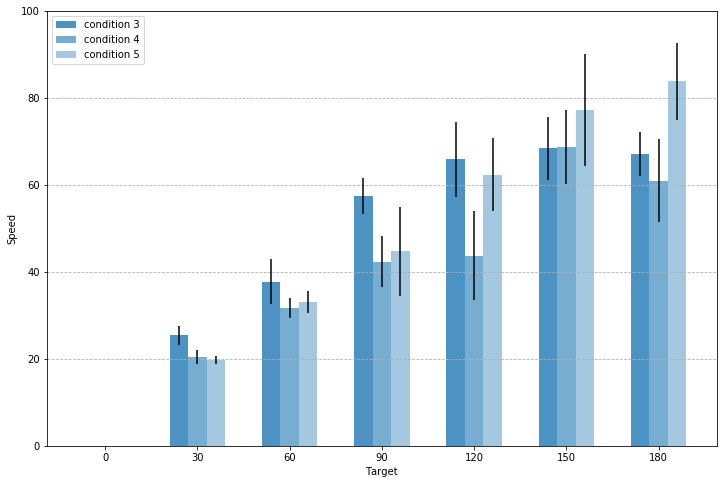

Reading ../Users/16/3.txt
Reading ../Users/16/4.txt
Reading ../Users/16/5.txt
[[0.0, 1.562519999999995, 1.9017750000000149, 2.1496399999999882, 2.278120000000013, 2.8136600000000103, 4.107740000000012], [0.0, 1.562519999999995, 1.9017750000000149, 2.1496399999999882, 2.278120000000013, 2.8136600000000103, 4.107740000000012]]
Reading ../Users/16/3.txt
Reading ../Users/16/4.txt
Reading ../Users/16/5.txt
(2, 7)
(1, 7)


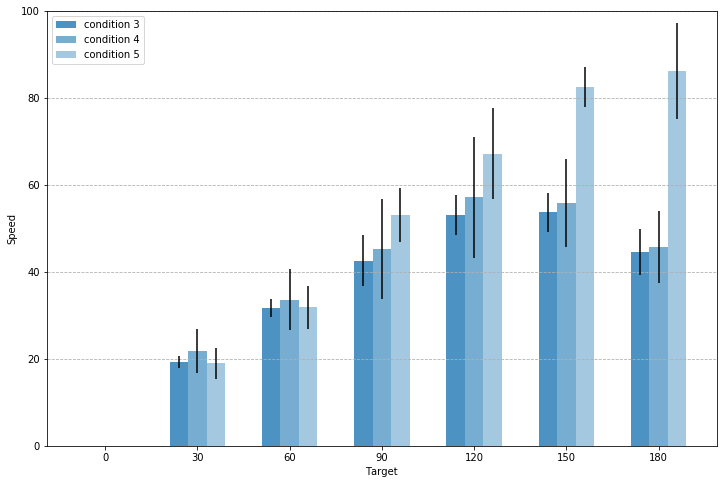

Reading ../Users/17/3.txt
Reading ../Users/17/4.txt
Reading ../Users/17/5.txt
[[0.0, 1.1599199999999996, 1.4910166666666573, 1.5956200000000138, 1.9827399999999897, 2.3185600000000024, 2.4694250000000295], [0.0, 1.1599199999999996, 1.4910166666666573, 1.5956200000000138, 1.9827399999999897, 2.3185600000000024, 2.4694250000000295]]
Reading ../Users/17/3.txt
Reading ../Users/17/4.txt
Reading ../Users/17/5.txt
(2, 7)
(1, 7)


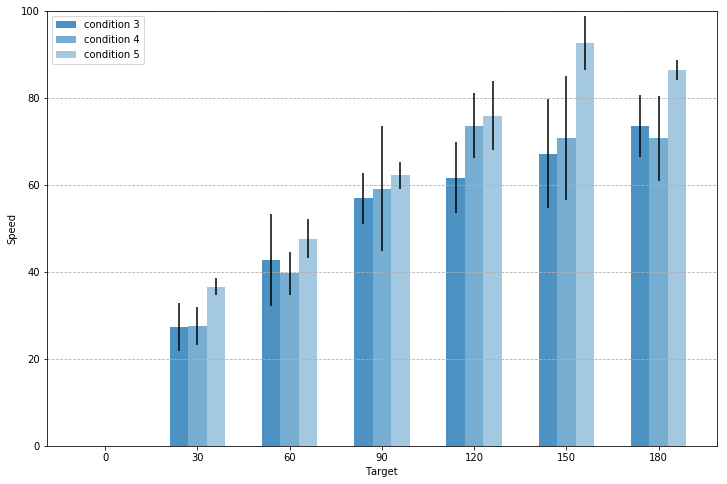

Reading ../Users/18/3.txt
Reading ../Users/18/4.txt
Reading ../Users/18/5.txt
[[0.0, 1.1671166666666484, 1.7216333333333107, 1.413919999999996, 2.044100000000005, 2.2564833333333447, 2.287983333333339], [0.0, 1.1671166666666484, 1.7216333333333107, 1.413919999999996, 2.044100000000005, 2.2564833333333447, 2.287983333333339]]
Reading ../Users/18/3.txt
Reading ../Users/18/4.txt
Reading ../Users/18/5.txt
(2, 7)
(1, 7)


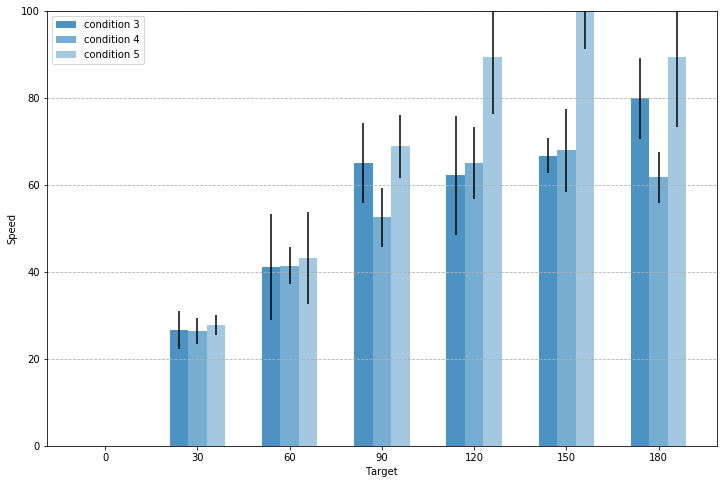

Reading ../Users/19/3.txt
Reading ../Users/19/4.txt
Reading ../Users/19/5.txt
[[0.0, 1.255099999999993, 1.4057249999999897, 1.7062199999999847, 1.8463399999999637, 2.81707499999996, 3.473940000000016], [0.0, 1.255099999999993, 1.4057249999999897, 1.7062199999999847, 1.8463399999999637, 2.81707499999996, 3.473940000000016]]
Reading ../Users/19/3.txt
Reading ../Users/19/4.txt
Reading ../Users/19/5.txt
(2, 7)
(1, 7)


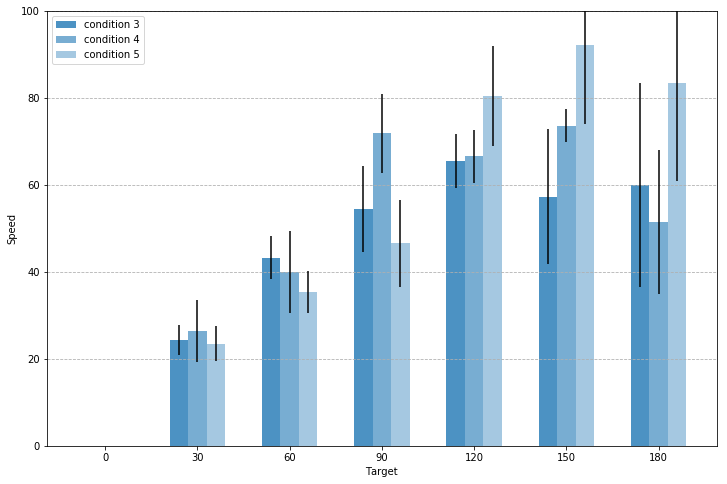

Reading ../Users/15/3.txt
Reading ../Users/15/4.txt
Reading ../Users/15/5.txt
[[0.0, 1.0078999999999922, 1.3445000000000011, 1.6246749999999963, 2.0248000000000133, 2.3416399999999955, 4.038749999999993], [0.0, 1.0078999999999922, 1.3445000000000011, 1.6246749999999963, 2.0248000000000133, 2.3416399999999955, 4.038749999999993]]
Reading ../Users/15/3.txt
Reading ../Users/15/4.txt
Reading ../Users/15/5.txt
(2, 7)
(1, 7)


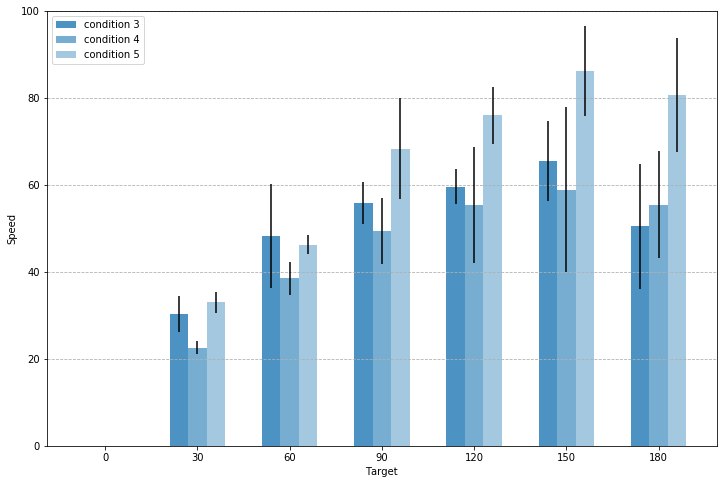

In [146]:
fig, ax = plt.subplots(figsize=(12,8))
speed1=[]
speed2=[]
speed3=[]
ratio=[[],[],[]]
###################### choose user
#users=[1,2,3,4,5,9,10,14,6,13]#,8,12,11]#,7]
users=[14,16,17,18,19,15]
######################
for uid in range(len(users)):
    baseFolder=str(users[uid])

    idx=[3,4,5]
    #idx=[1,2,3]

   # for i in range(len(idx)):
    #print("Trial 1"+str(i))
    t1=read_plot2("../Users/"+baseFolder+"/"+str(idx[0])+".txt",1,fig)
    #print("Trial 2"+str(i))
    t2=read_plot2("../Users/"+baseFolder+"/"+str(idx[1])+".txt",1,fig)
    t3=read_plot2("../Users/"+baseFolder+"/"+str(idx[2])+".txt",1,fig)
    
    s1 = make_speed(t1)
    print(t1)
    s2 = make_speed(t2)
    s3 = make_speed(t3)
    #r1=make_ratio(t1,t2)
    #r2=make_ratio(t1,t3)
    #r3=make_ratio(t2,t3)
    
    ts1, tsdev1 = read_plot3("../Users/"+baseFolder+"/"+str(idx[0])+".txt",1,fig)
    ts2, tsdev2 = read_plot3("../Users/"+baseFolder+"/"+str(idx[1])+".txt",1,fig)
    ts3, tsdev3 = read_plot3("../Users/"+baseFolder+"/"+str(idx[2])+".txt",1,fig)
    
    speed1.append(ts1)
    speed2.append(ts2)
    speed3.append(ts3)
    
    print(np.array(t1).shape)
    print(np.array(s1).shape)
    #ratio[2].append(r3[0])
    
    ratio[0].append(s1[0])
    ratio[1].append(s2[0])
    ratio[2].append(s3[0])
    
    #plotbar(r1)
    #plotratio(r1)
    #plotcontrast(s1[0],s2[0],s3[0]) # angle cal is not correct
    
    plotcontrast(ts1[0],ts2[0],ts3[0],tsdev1[0],tsdev2[0],tsdev3[0])

    #plotcontrast(s1[3],s2[3]) #all 3
    #plotratio(r3)
    
  

[[0.0, 25.53881331965537, 40.78272390290223, 55.382761442618296, 61.31563583406355, 63.122717064391686, 62.584911364607024]] [[0.0, 3.351534014262955, 5.109028190421278, 6.629115612762496, 4.287903696646025, 5.54981627699937, 12.39159209006903]]


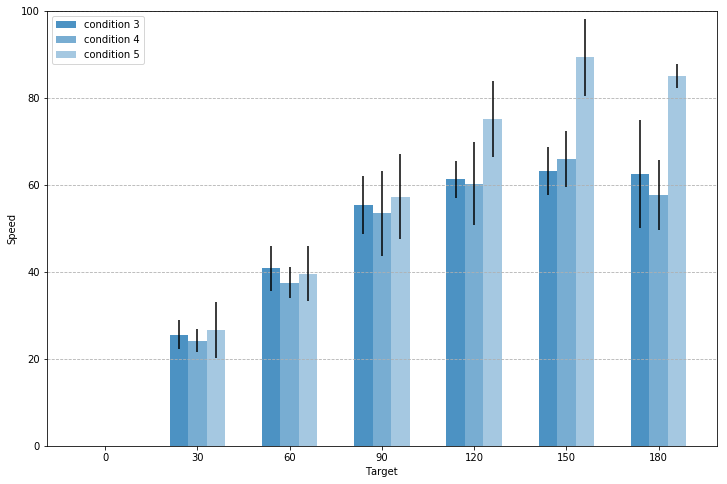

In [147]:
def calMean(data):

    meanR=[]
    stdR=[]
    
    #print(len(data[0]))
    
    for i in range(1): # 3 when all 3
        meanR.append([])
        stdR.append([])
        
        for j in range(7):
            r=[]
            
            if (i==1 and j==0):
                continue
            for k in range(len(data)):
                #print("i=" + str(i) + ",j=" + str(j) + ",k=" + str(k)) 
                r.append(data[k][i][j])
                #print("ok!")
            
            #print("RRR")
            #print(str(r))
            
            meanR[i].append(np.mean(r))
            stdR[i].append(np.std(r))
            
    #print(np.array(meanR).shape)
    
    return meanR, stdR





speedMean1, speedStd1 = calMean(speed1)
print(str(speedMean1),str(speedStd1))
speedMean2, speedStd2 = calMean(speed2)
speedMean3, speedStd3 = calMean(speed3)


    
#print(np.array(speedMean1).shape)
#print(np.array(speed1).shape)
#print(meanR,StdR)
#plotratio(meanR,StdR)
plotcontrast(speedMean1[0],speedMean2[0],speedMean3[0], speedStd1[0], speedStd2[0], speedStd3[0])
#plotcontrast(ratioMean[0],ratioMean[1],ratioMean[2])

